# About the dataset

This dataset, spanning from January 2020 to May 2024, contains a comprehensive collection of global climate data. It includes various climatic features measured on a monthly basis, providing insights into weather patterns, temperature changes, and environmental conditions over time.

Author:Atif Masih



# Problem Statement

Building an Al model to predict and mitigate the impact of climate change by analysing historical climate data, current environmental conditions, and human activities. The solution should help policymakers and organizations develop effective climate action plans.

# Objective

Develop a robust AI model to predict and mitigate the impacts of climate change by analyzing historical climate data, current environmental conditions, and human activities. This solution will empower policymakers and organizations to craft effective and proactive climate action plans.

# Scope

1.Data Collection and Preprocessing.

2.Exploratory Data Analysis (EDA).

3.Feature Engineering.

4.Model Development.

5.Insights

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/climate-change-dataset2020-2024/climate_change_dataset.csv


# 1. Data Loading and Initial Inspection

In [83]:
import pandas as pd
df=pd.read_csv('/kaggle/input/climate-change-dataset2020-2024/climate_change_dataset.csv')
df.head()

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

In [85]:
import pandas as pd
import numpy as np

# Convert columns to appropriate data types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').astype('Int64')
df['Avg_Temp (°C)'] = pd.to_numeric(df['Avg_Temp (°C)'], errors='coerce')
df['Max_Temp (°C)'] = pd.to_numeric(df['Max_Temp (°C)'], errors='coerce')
df['Min_Temp (°C)'] = pd.to_numeric(df['Min_Temp (°C)'], errors='coerce')
df['Precipitation (mm)'] = pd.to_numeric(df['Precipitation (mm)'], errors='coerce')
df['Humidity (%)'] = pd.to_numeric(df['Humidity (%)'], errors='coerce')
df['Wind_Speed (m/s)'] = pd.to_numeric(df['Wind_Speed (m/s)'], errors='coerce')
df['Solar_Irradiance (W/m²)'] = pd.to_numeric(df['Solar_Irradiance (W/m²)'], errors='coerce')
df['Cloud_Cover (%)'] = pd.to_numeric(df['Cloud_Cover (%)'], errors='coerce')
df['CO2_Concentration (ppm)'] = pd.to_numeric(df['CO2_Concentration (ppm)'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Altitude (m)'] = pd.to_numeric(df['Altitude (m)'], errors='coerce')
df['Proximity_to_Water (km)'] = pd.to_numeric(df['Proximity_to_Water (km)'], errors='coerce')
df['Urbanization_Index'] = pd.to_numeric(df['Urbanization_Index'], errors='coerce')
df['Vegetation_Index'] = pd.to_numeric(df['Vegetation_Index'], errors='coerce')
df['ENSO_Index'] = pd.to_numeric(df['ENSO_Index'], errors='coerce')
df['Particulate_Matter (µg/m³)'] = pd.to_numeric(df['Particulate_Matter (µg/m³)'], errors='coerce')
df['Sea_Surface_Temp (°C)'] = pd.to_numeric(df['Sea_Surface_Temp (°C)'], errors='coerce')

print(df.dtypes)


Year                            Int64
Month                           Int64
Avg_Temp (°C)                 float64
Max_Temp (°C)                 float64
Min_Temp (°C)                 float64
Precipitation (mm)            float64
Humidity (%)                  float64
Wind_Speed (m/s)              float64
Solar_Irradiance (W/m²)       float64
Cloud_Cover (%)               float64
CO2_Concentration (ppm)       float64
Latitude                      float64
Longitude                     float64
Altitude (m)                  float64
Proximity_to_Water (km)       float64
Urbanization_Index            float64
Vegetation_Index              float64
ENSO_Index                    float64
Particulate_Matter (µg/m³)    float64
Sea_Surface_Temp (°C)         float64
dtype: object


In [86]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values
df['Avg_Temp (°C)'].fillna(df['Avg_Temp (°C)'].mean(), inplace=True)
df['Max_Temp (°C)'].fillna(df['Max_Temp (°C)'].mean(), inplace=True)
df['Min_Temp (°C)'].fillna(df['Min_Temp (°C)'].mean(), inplace=True)
df['Precipitation (mm)'].fillna(df['Precipitation (mm)'].mean(), inplace=True)
df['Humidity (%)'].replace('Unknown', np.nan, inplace=True)
df['Humidity (%)'].fillna(df['Humidity (%)'].mean(), inplace=True)
df['Wind_Speed (m/s)'].fillna(df['Wind_Speed (m/s)'].mean(), inplace=True)
df['Solar_Irradiance (W/m²)'].fillna(df['Solar_Irradiance (W/m²)'].mean(),inplace=True)
df['Solar_Irradiance (W/m²)'].fillna(df['Solar_Irradiance (W/m²)'].mean(), inplace=True)
df['Cloud_Cover (%)'].fillna(df['Cloud_Cover (%)'].mean(), inplace=True)
df['CO2_Concentration (ppm)'].fillna(df['CO2_Concentration (ppm)'].mean(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df['Altitude (m)'].fillna(df['Altitude (m)'].mean(), inplace=True)
df['Proximity_to_Water (km)'].fillna(df['Proximity_to_Water (km)'].mean(), inplace=True)
df['Urbanization_Index'].fillna(df['Urbanization_Index'].mean(), inplace=True)
df['Vegetation_Index'].fillna(df['Vegetation_Index'].mean(), inplace=True)
df['ENSO_Index'].fillna(df['ENSO_Index'].mean(), inplace=True)
df['Particulate_Matter (µg/m³)'].fillna(df['Particulate_Matter (µg/m³)'].mean(), inplace=True)
df['Sea_Surface_Temp (°C)'].fillna(df['Sea_Surface_Temp (°C)'].mean(), inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())


Missing values:
 Year                          6
Month                         6
Avg_Temp (°C)                 7
Max_Temp (°C)                 8
Min_Temp (°C)                 9
Precipitation (mm)            5
Humidity (%)                  9
Wind_Speed (m/s)              3
Solar_Irradiance (W/m²)       6
Cloud_Cover (%)               5
CO2_Concentration (ppm)       6
Latitude                      7
Longitude                     4
Altitude (m)                  5
Proximity_to_Water (km)       7
Urbanization_Index            3
Vegetation_Index              4
ENSO_Index                    4
Particulate_Matter (µg/m³)    4
Sea_Surface_Temp (°C)         8
dtype: int64
Missing values after imputation:
 Year                          6
Month                         6
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Co

**Outlier treatment**

In [87]:
df=df.dropna()
def detect_and_correct_outliers(df, column):
    # Drop NA values before calculating the quantiles
    Q1 = df[column].dropna().quantile(0.25)
    Q3 = df[column].dropna().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply outlier correction
for col in df.select_dtypes(include=[np.float64, np.int64]).columns:
    df = detect_and_correct_outliers(df, col)

print("Outliers corrected.")


Outliers corrected.


# Exploratory Data Analysis starts

**Univariate Analysis**

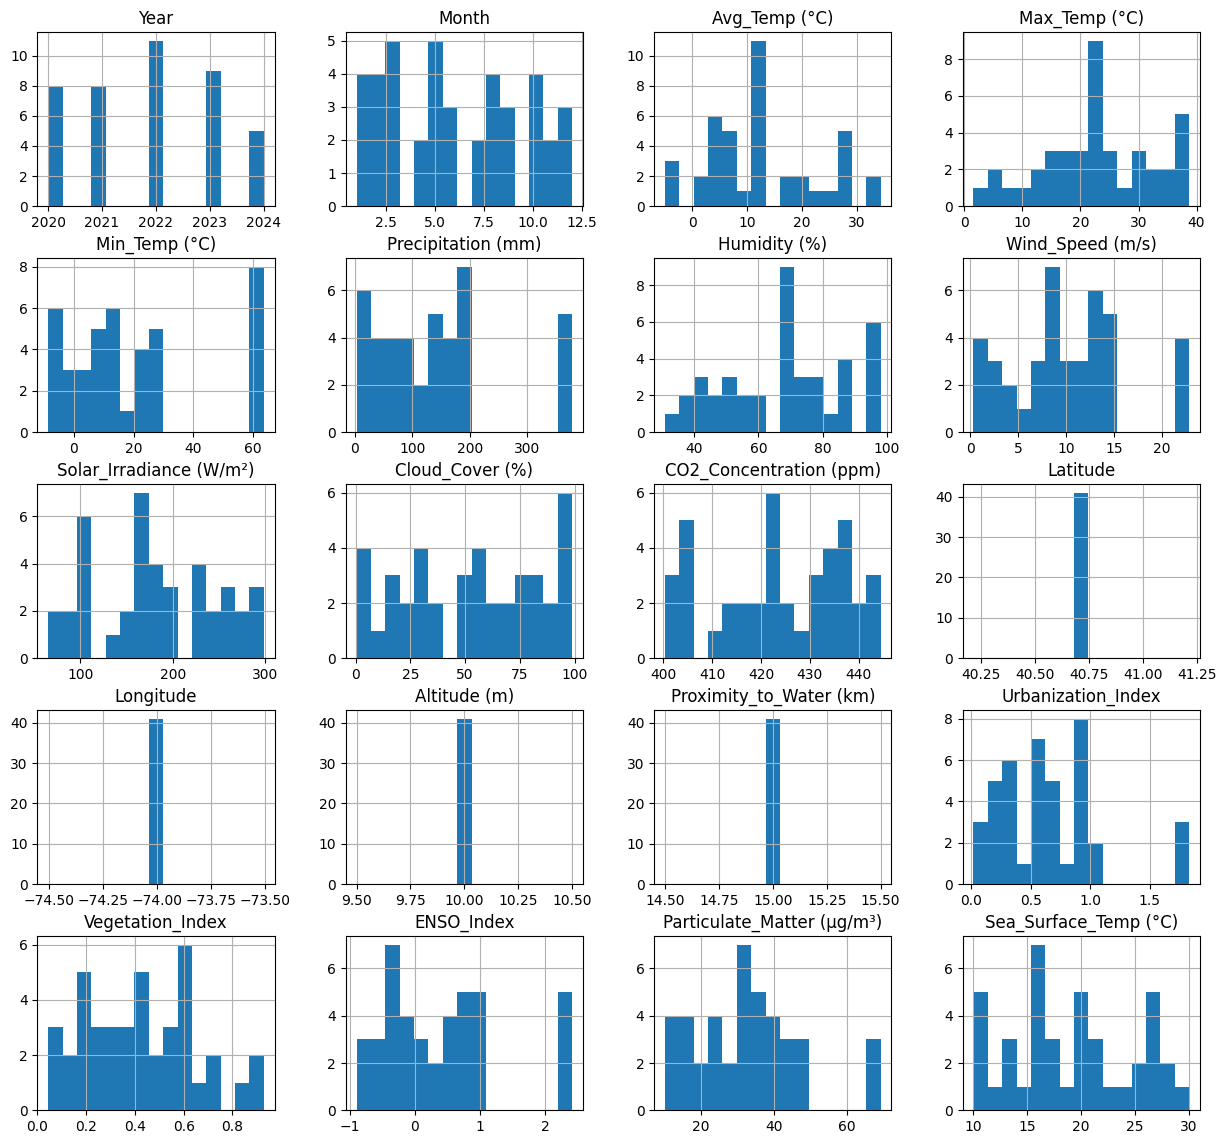

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical columns
numeric_cols = df.select_dtypes(include=[np.float64, np.int64]).columns
df[numeric_cols].hist(bins=15, figsize=(15, 14))
plt.show()


**Bivariate analysis**

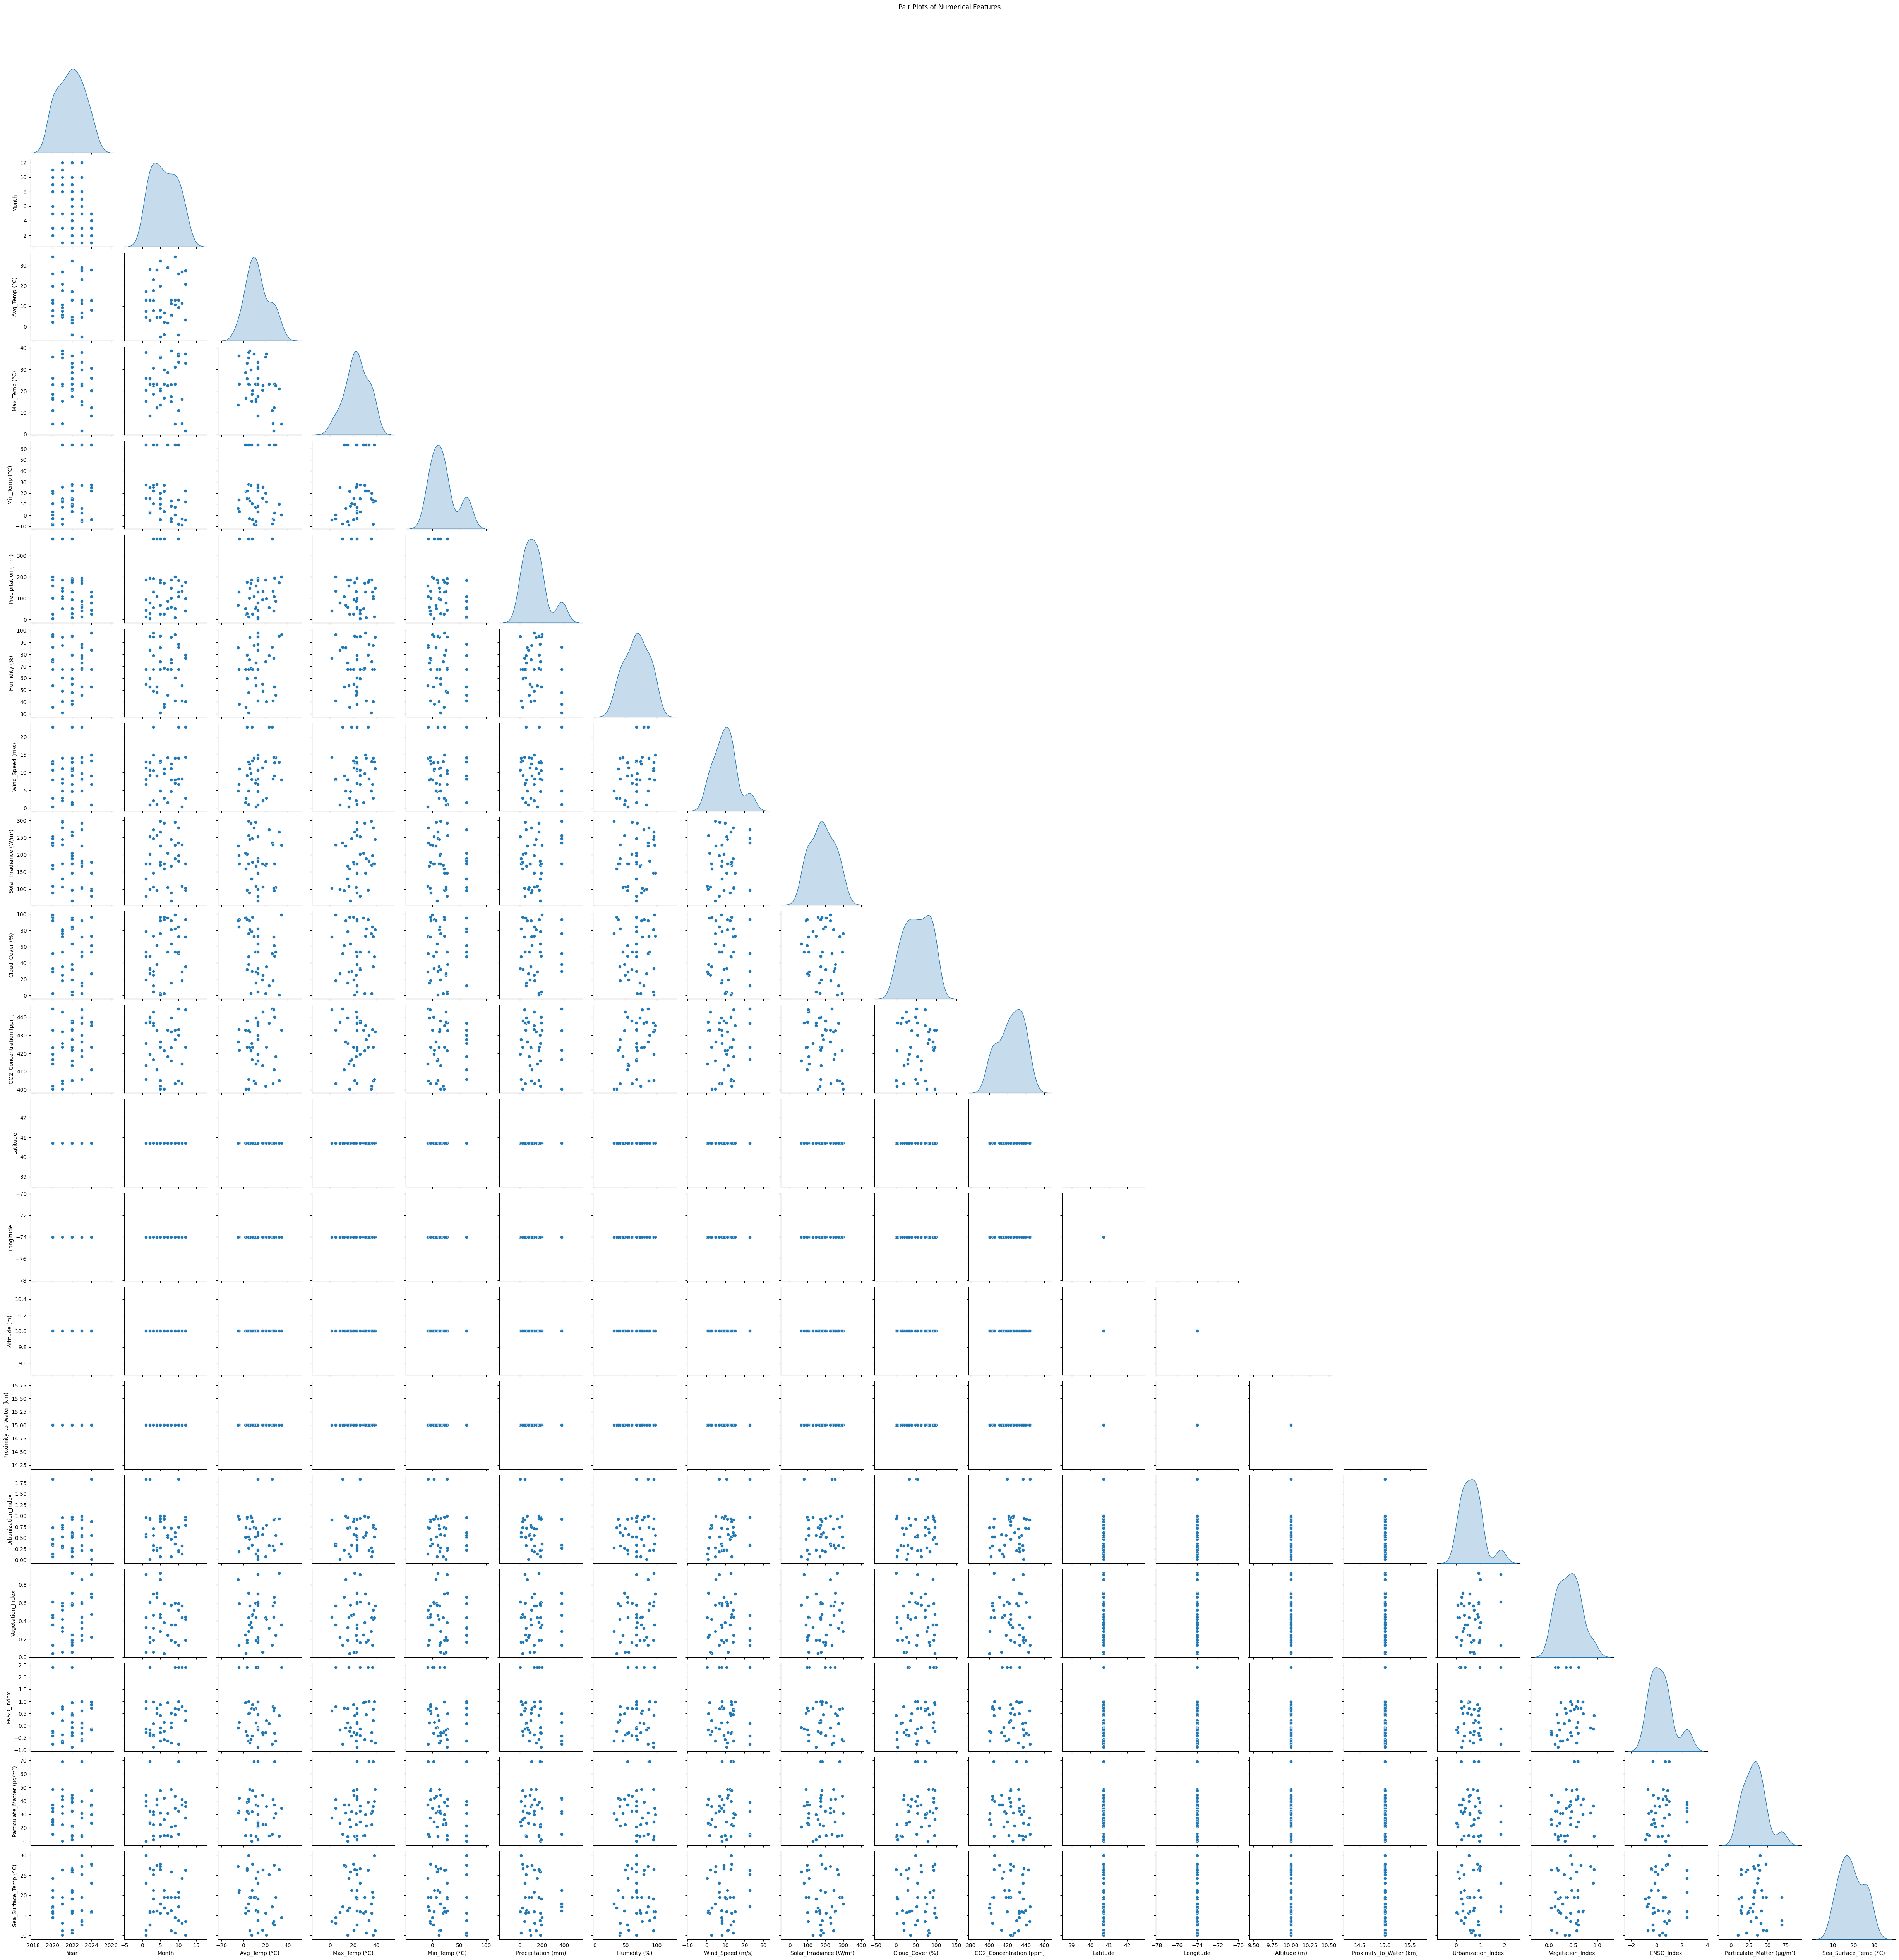

In [89]:
 # Bivariate analysis using pairplot
sns.pairplot(df, diag_kind='kde', corner=True, palette='dark')
plt.suptitle('Pair Plots of Numerical Features', y=1.02)
plt.show()

**Multivariate Analysis**

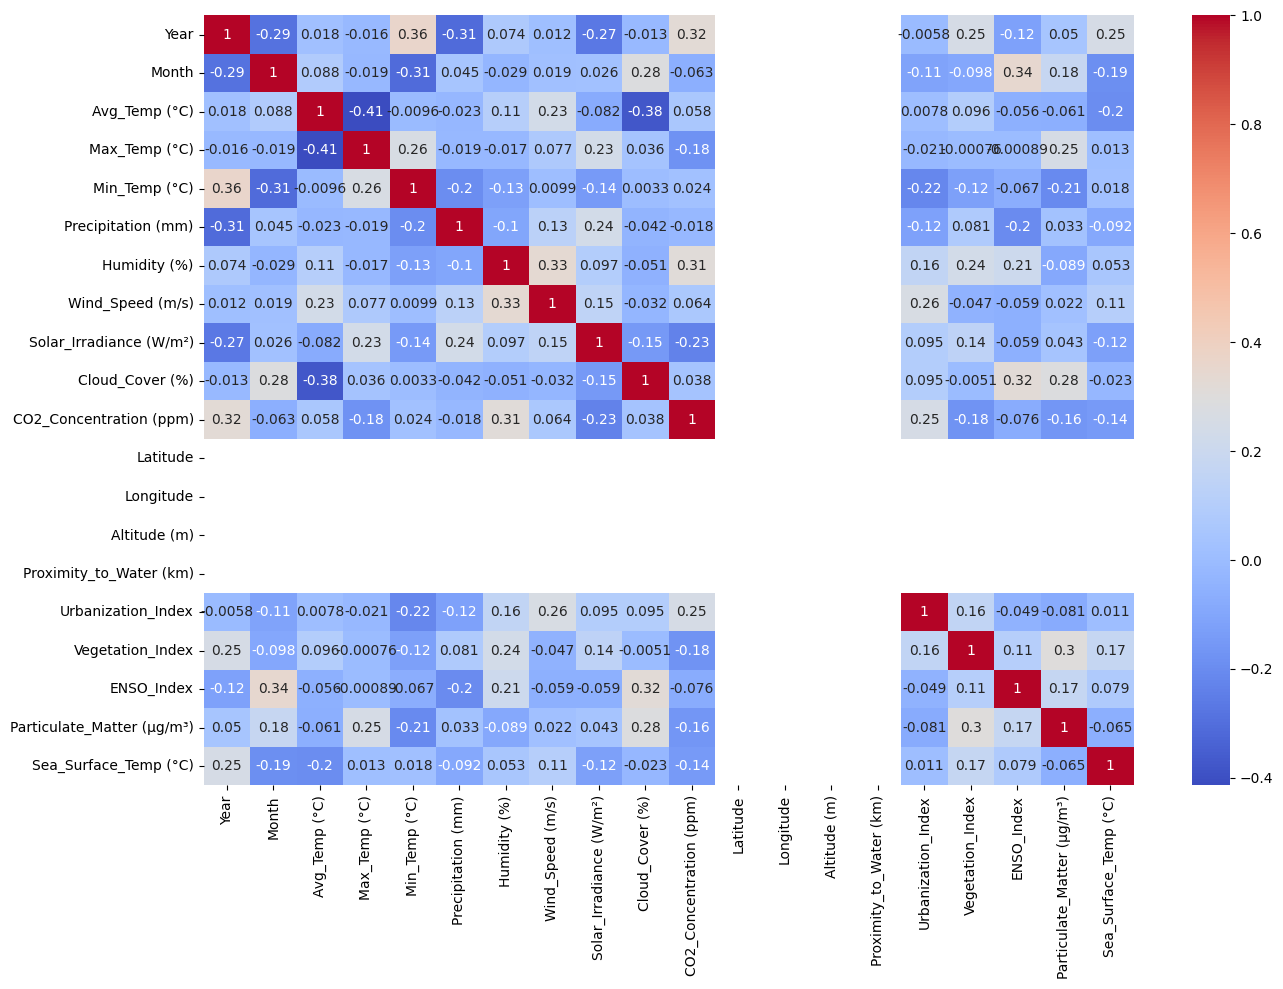

In [90]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


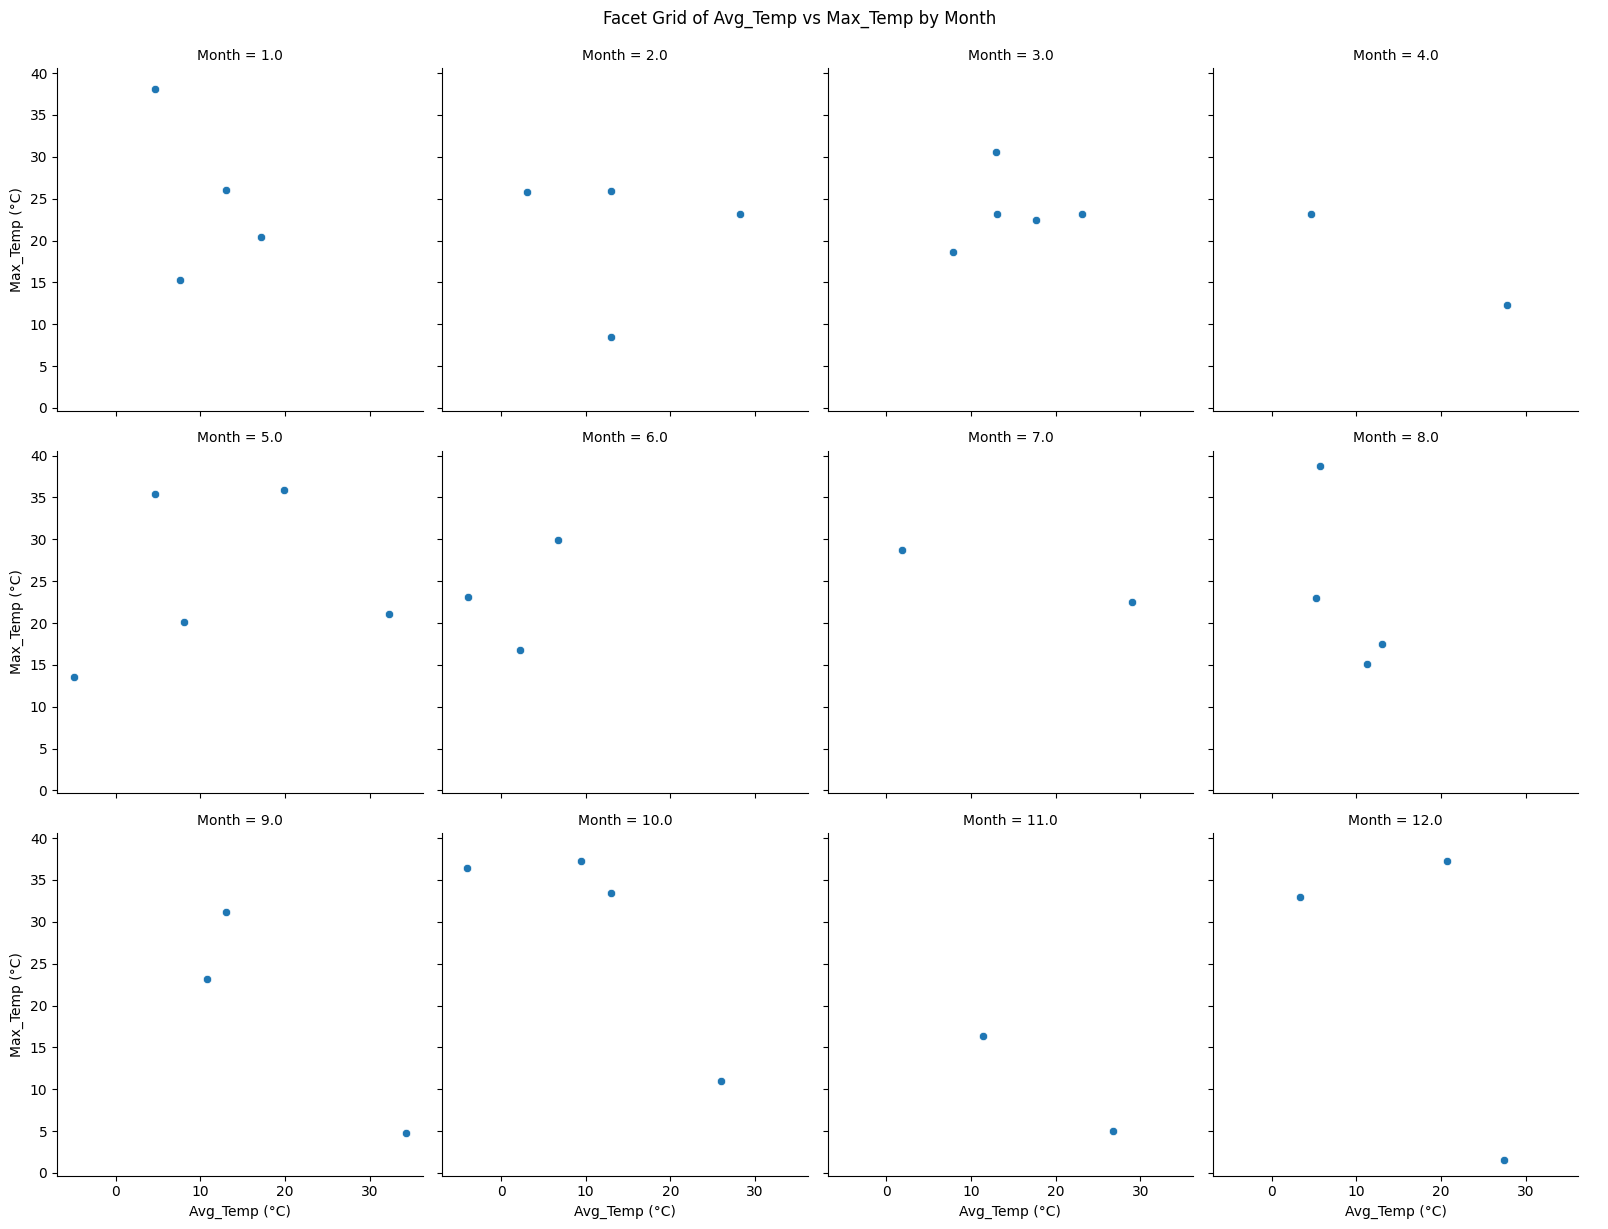

In [91]:
# 4. Facet Grid (e.g., Avg_Temp vs Max_Temp conditioned on Month)
g = sns.FacetGrid(df, col='Month', col_wrap=4, height=4)
g.map(sns.scatterplot, 'Avg_Temp (°C)', 'Max_Temp (°C)')
g.add_legend()
plt.suptitle('Facet Grid of Avg_Temp vs Max_Temp by Month', y=1.02)
plt.show()

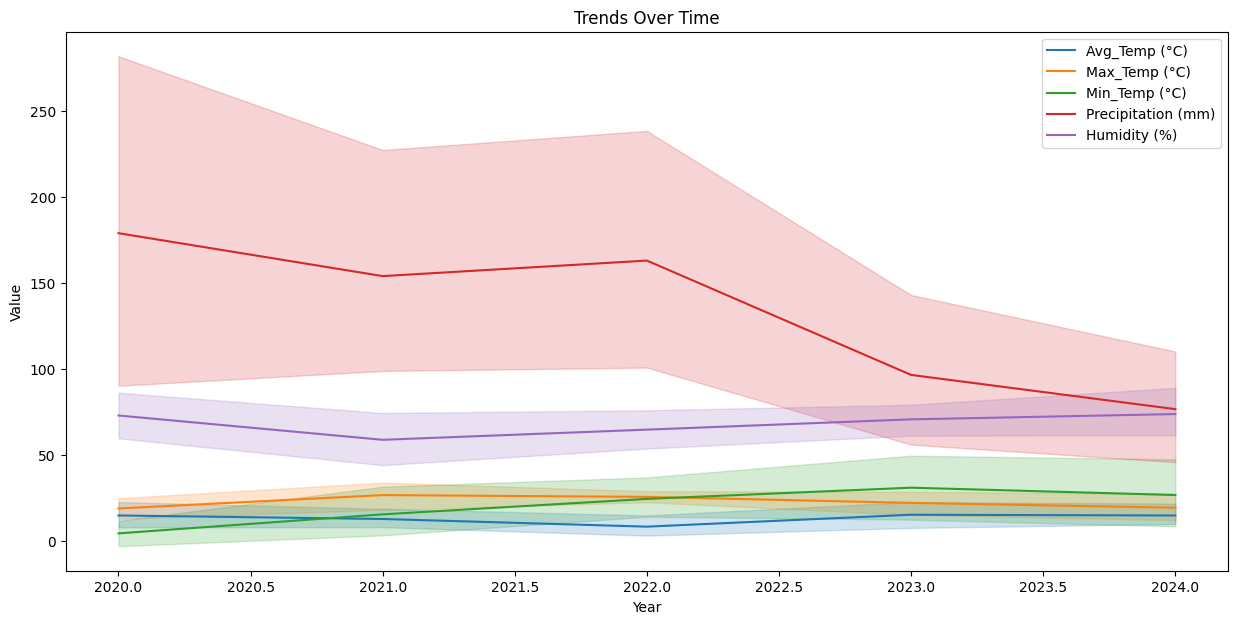

In [92]:
features_to_plot = ['Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)', 'Precipitation (mm)', 'Humidity (%)']
plt.figure(figsize=(15, 7))
for feature in features_to_plot:
    sns.lineplot(data=df, x='Year', y=feature, label=feature)
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Feature Engineering

In [93]:
# Assuming all columns are features except for Year and Month
features = df.drop(['Year', 'Month'], axis=1)
target_cols = ['Avg_Temp (°C)', 'Precipitation (mm)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)', 'Sea_Surface_Temp (°C)']

# Separating features and targets
X = features.drop(target_cols, axis=1)
y = features[target_cols]


# Model Development

**Regression**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Defining the models and hyperparameters for GridSearchCV
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'epsilon': [0.01, 0.1, 0.2]
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3]
    }
}


Hyperparameter tuning for Avg_Temp (°C)...
Hyperparameter tuning for Precipitation (mm)...
Hyperparameter tuning for Solar_Irradiance (W/m²)...
Hyperparameter tuning for Cloud_Cover (%)...
Hyperparameter tuning for CO2_Concentration (ppm)...
Hyperparameter tuning for Sea_Surface_Temp (°C)...
Regression Models Evaluation Metrics:
                                             Model       RMSE        MAE  \
Avg_Temp (°C)                                  SVR   9.458022   7.981209   
Precipitation (mm)           RandomForestRegressor  116.70625  90.094259   
Solar_Irradiance (W/m²)                        SVR  69.476756  59.404898   
Cloud_Cover (%)                                SVR  32.024411  29.782873   
CO2_Concentration (ppm)                 ElasticNet  16.541173  13.064797   
Sea_Surface_Temp (°C)    GradientBoostingRegressor   8.567078    7.41878   

                               R²  
Avg_Temp (°C)           -0.070562  
Precipitation (mm)      -0.260884  
Solar_Irradiance (W/m²) -0.0

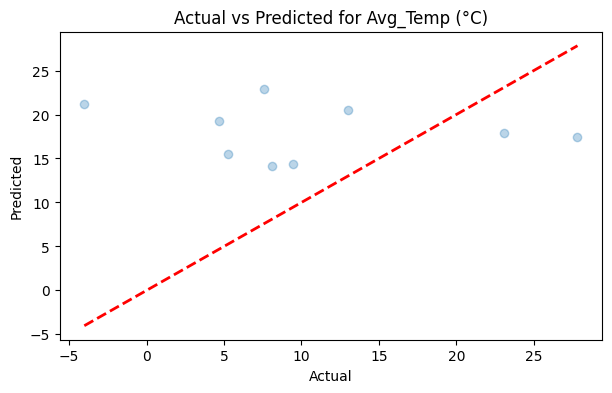

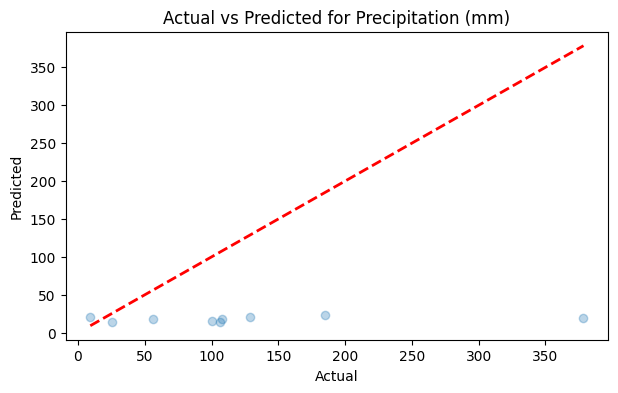

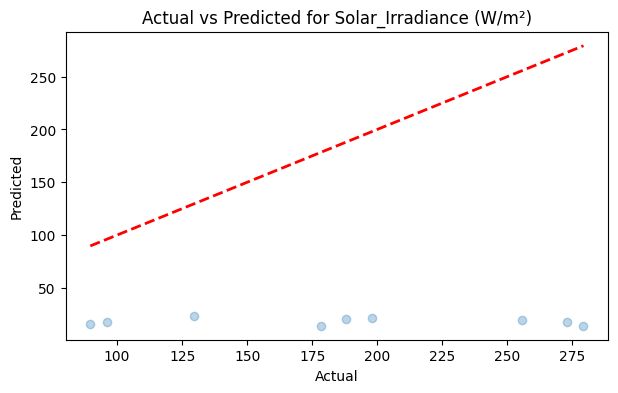

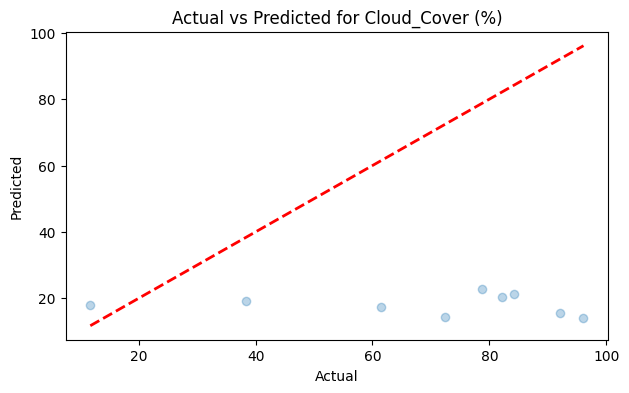

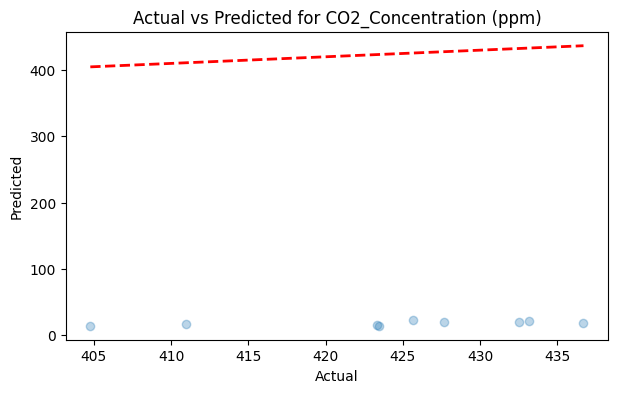

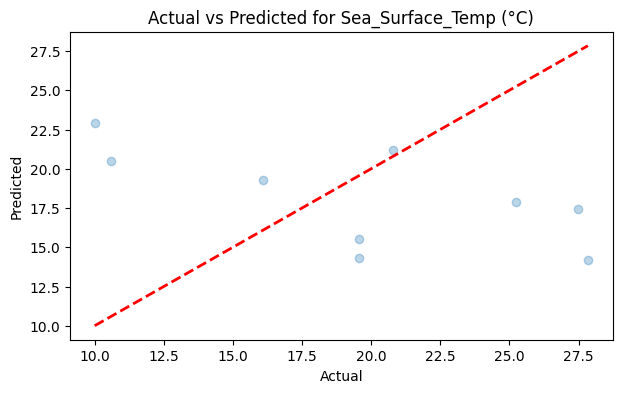

In [95]:
target_cols = y.columns  # List of target column names

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing a dictionary to store the best models for each target
best_models = {target: None for target in target_cols}

# Hyperparameter tuning and model training
for target in target_cols:
    print(f"Hyperparameter tuning for {target}...")
    best_score = float('inf')
    best_model = None
    
    for model_name in models:
        grid_search = GridSearchCV(models[model_name], params[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train[target])
        if -grid_search.best_score_ < best_score:
            best_score = -grid_search.best_score_
            best_model = grid_search.best_estimator_
    
    best_models[target] = best_model
    
# Initializing dictionaries to store evaluation metrics for regression models
regression_metrics = {target: {} for target in target_cols}

# Calculatiom of evaluation metrics for each target using regression models
for target in target_cols:
    predictions = best_models[target].predict(X_test)
    regression_metrics[target]['Model'] = type(best_models[target]).__name__
    regression_metrics[target]['RMSE'] = np.sqrt(mean_squared_error(y_test[target], predictions))
    regression_metrics[target]['MAE'] = mean_absolute_error(y_test[target], predictions)
    regression_metrics[target]['R²'] = r2_score(y_test[target], predictions)

# Conversion of metrics to DataFrame for better visualization
regression_metrics_df = pd.DataFrame(regression_metrics).T
print("Regression Models Evaluation Metrics:")
print(regression_metrics_df)

for target in target_cols:
    plt.figure(figsize=(7, 4))
    plt.scatter(y_test[target], predictions, alpha=0.3)
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {target}')
    plt.show()

**Deep Learning**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


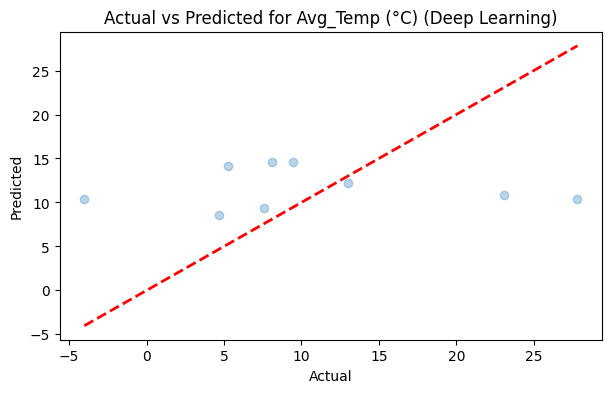

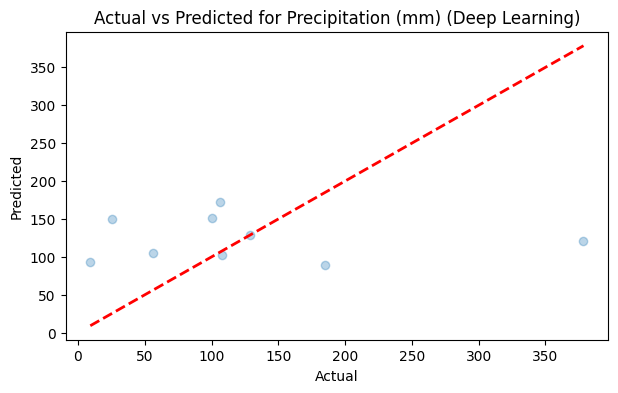

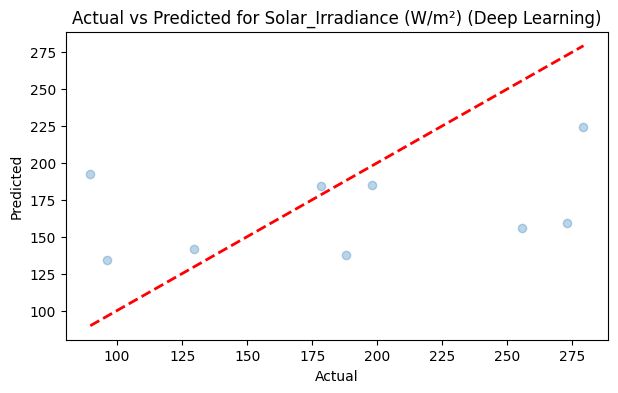

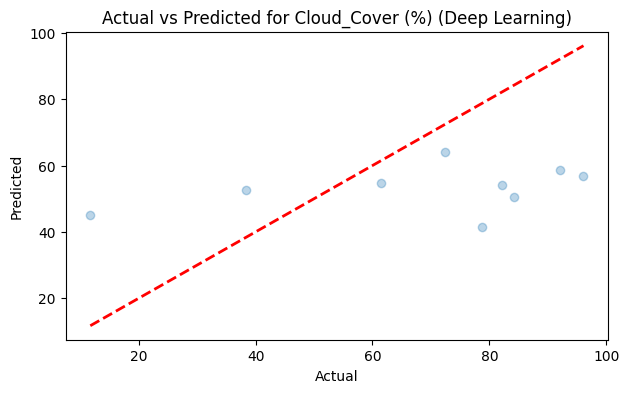

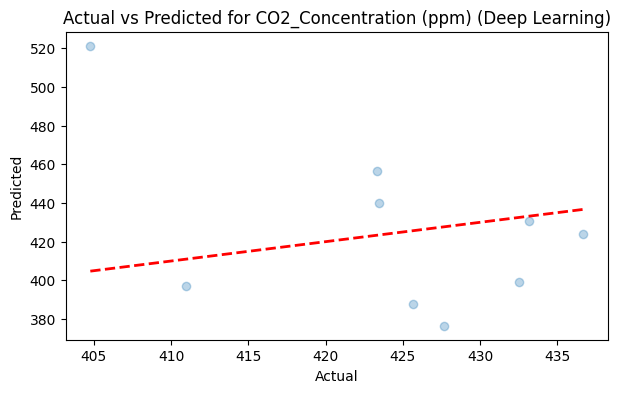

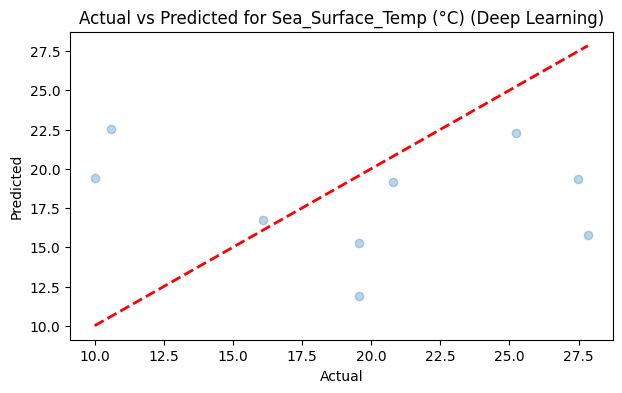

Deep Learning Models Evaluation Metrics:
                               RMSE        MAE         R²
Avg_Temp (°C)              9.604921   7.915490  -0.104075
Precipitation (mm)       109.248058  81.475446  -0.104878
Solar_Irradiance (W/m²)   67.372084  54.572127   0.023190
Cloud_Cover (%)           28.696932  26.051055  -0.223629
CO2_Concentration (ppm)   47.629669  35.213890 -22.366238
Sea_Surface_Temp (°C)      7.684365   6.521734  -0.522607


In [96]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

dl_models = {target: create_model(X_train.shape[1]) for target in target_cols}

# Training the deep learning models
for target in target_cols:
    dl_models[target].fit(X_train, y_train[target], epochs=50, batch_size=10, verbose=0)

# Making predictions from deep learning models
dl_predictions = {target: dl_models[target].predict(X_test).flatten() for target in target_cols}

# Initializing dictionaries to store evaluation metrics for deep learning models
dl_metrics = {target: {} for target in target_cols}

# Calculation of evaluation metrics for each target using deep learning models
for target in target_cols:
    dl_metrics[target]['RMSE'] = np.sqrt(mean_squared_error(y_test[target], dl_predictions[target]))
    dl_metrics[target]['MAE'] = mean_absolute_error(y_test[target], dl_predictions[target])
    dl_metrics[target]['R²'] = r2_score(y_test[target], dl_predictions[target])

    # Plotting actual vs predicted values for deep learning models
    plt.figure(figsize=(7, 4))
    plt.scatter(y_test[target], dl_predictions[target], alpha=0.3)
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {target} (Deep Learning)')
    plt.show()

# Convertion of metrics to DataFrame for better visualization
dl_metrics_df = pd.DataFrame(dl_metrics).T
print("Deep Learning Models Evaluation Metrics:")
print(dl_metrics_df)

# Predictions

In [97]:
#predictions from deep learning models
dl_predictions = {target: dl_models[target].predict(X_test).flatten() for target in target_cols}

# Combination of predictions from all models including deep learning
final_predictions = {target: dl_predictions[target] for target in target_cols}

# Addition of predictions from non-deep learning models
for target in target_cols:
    for model in best_models.values():
        final_predictions[target] += model.predict(X_test)
    final_predictions[target] /= (len(best_models) + 1)

# Calculation of evaluation metrics for the combined predictions
combined_metrics = {target: {} for target in target_cols}
for target in target_cols:
    combined_predictions = final_predictions[target]
    combined_metrics[target]['Model'] = 'Combined Model'
    combined_metrics[target]['RMSE'] = np.sqrt(mean_squared_error(y_test[target], combined_predictions))
    combined_metrics[target]['MAE'] = mean_absolute_error(y_test[target], combined_predictions)
    combined_metrics[target]['R²'] = r2_score(y_test[target], combined_predictions)

# Convertion of metrics to DataFrame for better visualization
combined_metrics_df = pd.DataFrame(combined_metrics).T
print(combined_metrics_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
                                  Model        RMSE         MAE          R²
Avg_Temp (°C)            Combined Model  107.364459   107.05697  -136.95334
Precipitation (mm)       Combined Model  105.555519   80.011981   -0.031452
Solar_Irradiance (W/m²)  Combined Model   79.501401   67.735462    -0.36019
Cloud_Cover (%)          Combined Model   62.981802   54.970808   -4.893987
CO2_Concentration (ppm)  Combined Model  247.876529  247.454207 -631.855394
Sea_Surface_Temp (°C)    Combined Model   99.053786   98.841341  -251.99617


In [98]:
# Convertion predictions to DataFrame
predictions_df = pd.DataFrame(final_predictions)

# Addition actual values to the DataFrame
for target in target_cols:
    predictions_df[f'Actual_{target}'] = y_test[target].values

# Display of the combined DataFrame
print(predictions_df.head())


   Avg_Temp (°C)  Precipitation (mm)  Solar_Irradiance (W/m²)  \
0     113.825264          125.385849               131.734741   
1     119.278214          141.865906               149.185715   
2     110.909607          122.363052               129.817108   
3     116.045433          132.990768               140.963577   
4     115.945671          135.593033               141.447983   

   Cloud_Cover (%)  CO2_Concentration (ppm)  Sea_Surface_Temp (°C)  \
0       119.819008               165.880447             115.301277   
1       126.337952               191.655106             118.899544   
2       115.502487               164.996262             112.335670   
3       121.759087               176.106415             117.291748   
4       122.290657               179.110199             116.109604   

   Actual_Avg_Temp (°C)  Actual_Precipitation (mm)  \
0             13.018699                   9.233454   
1              9.469615                 106.553293   
2              7.587887   

# Time Series Analysis

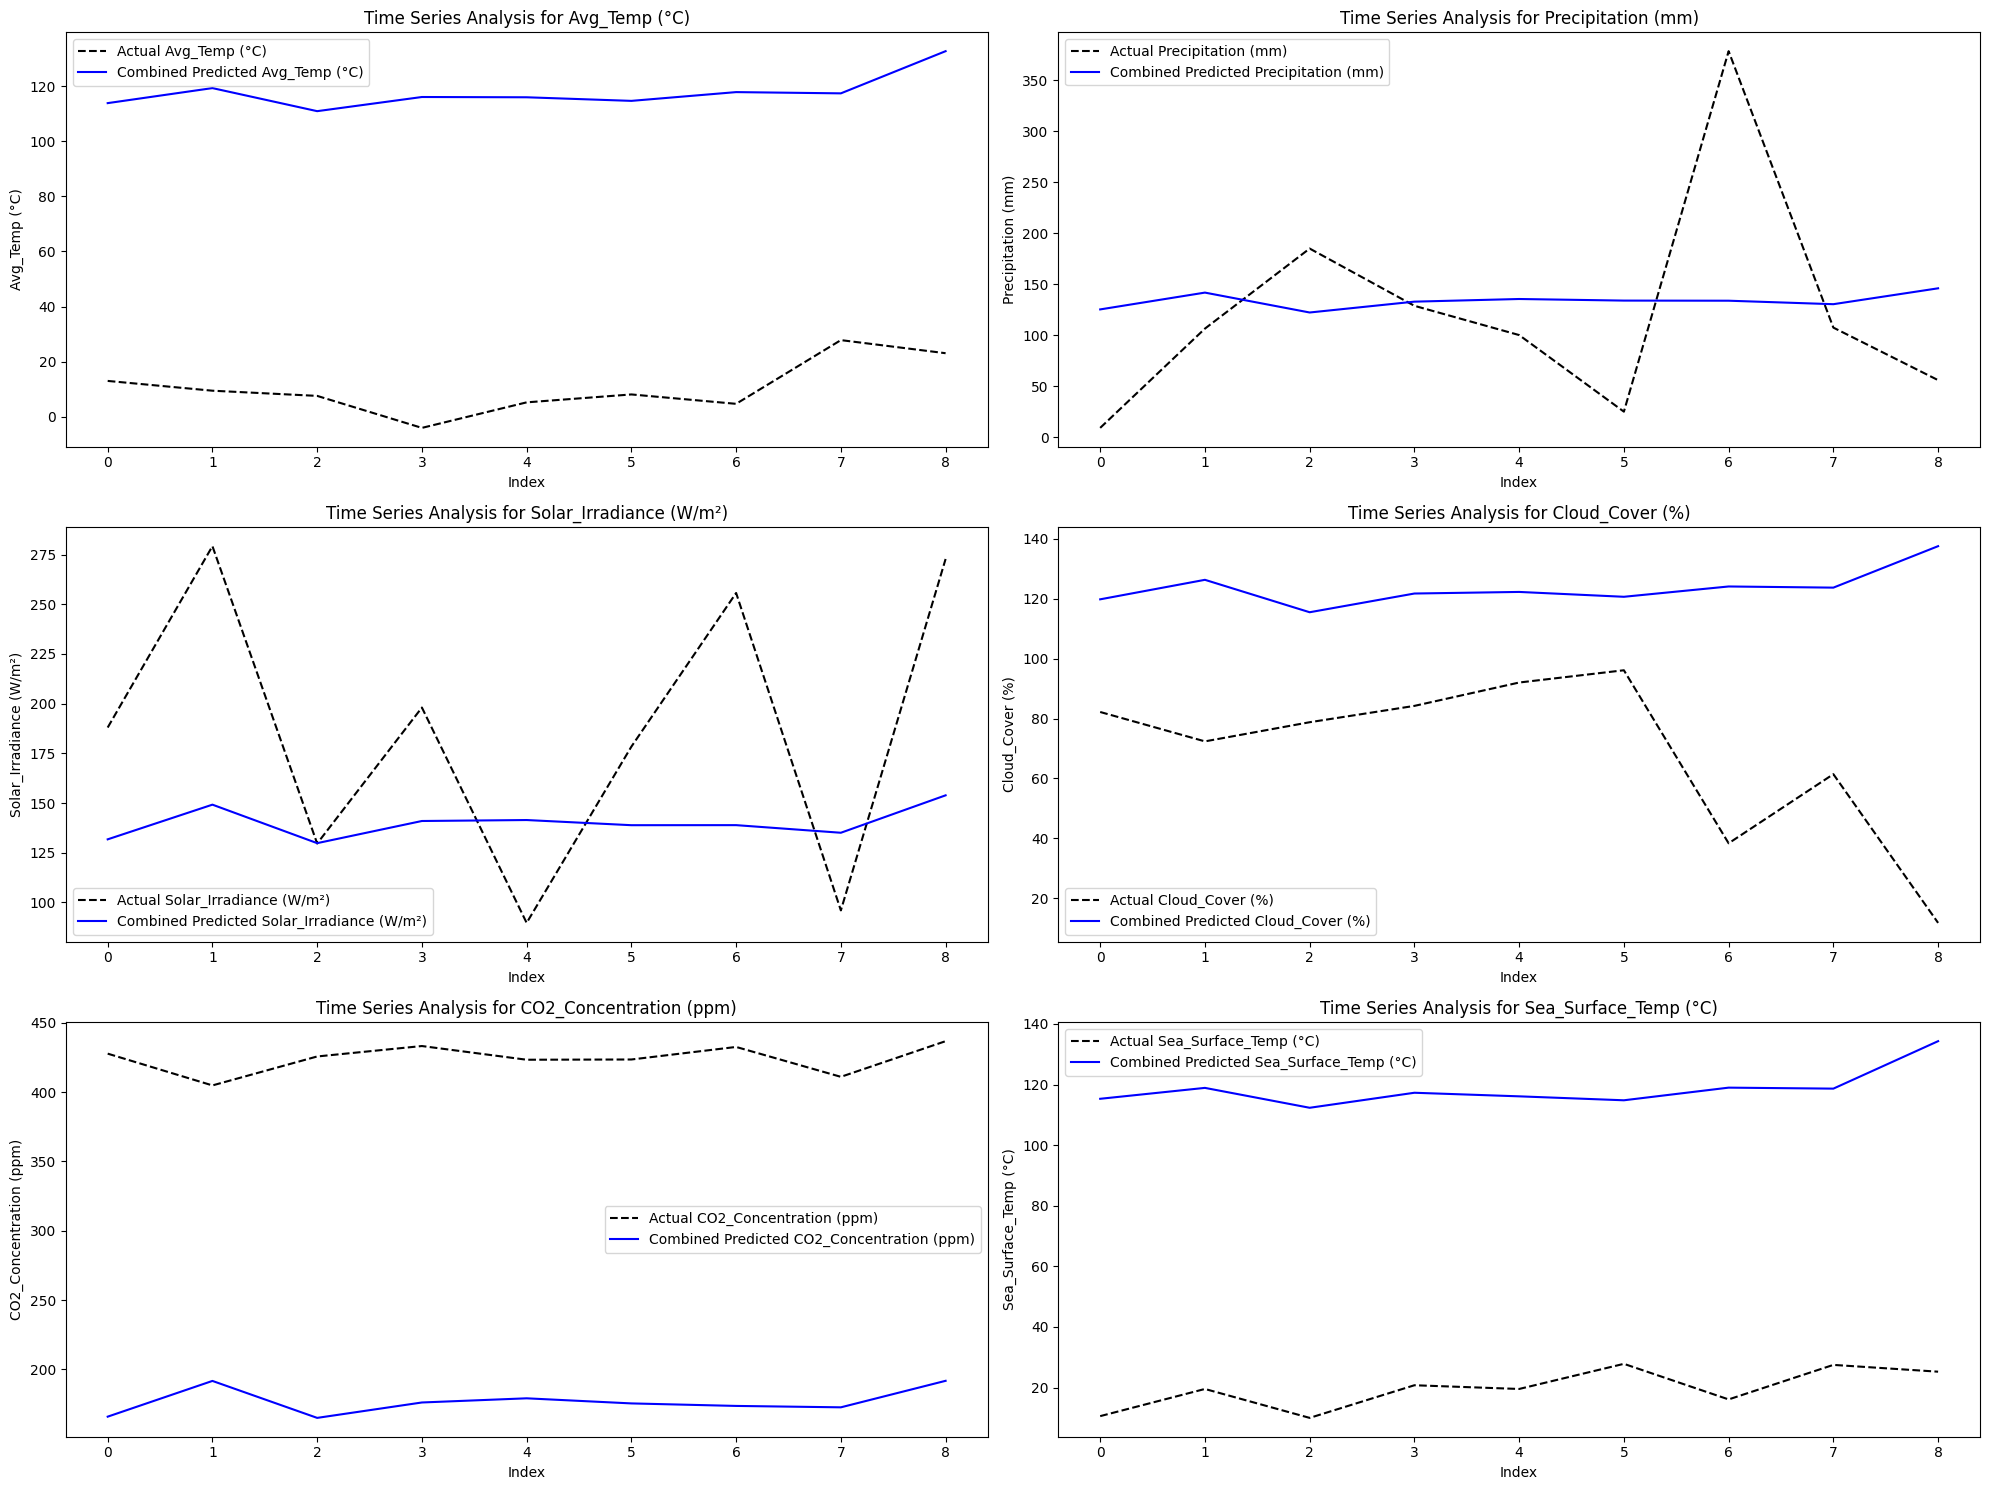

In [99]:
# Plotting time series for each feature
plt.figure(figsize=(20, 15))
for i, target in enumerate(target_cols):
    plt.subplot(3, 2, i+1)
    plt.plot(predictions_df.index, predictions_df[f'Actual_{target}'], label=f'Actual {target}', color='black', linestyle='dashed')
    plt.plot(predictions_df.index, predictions_df[target], label=f'Combined Predicted {target}', color='blue')
    plt.xlabel('Index')
    plt.ylabel(target)
    plt.title(f'Time Series Analysis for {target}')
    plt.legend()

plt.tight_layout()
plt.show()


# Final Prediction

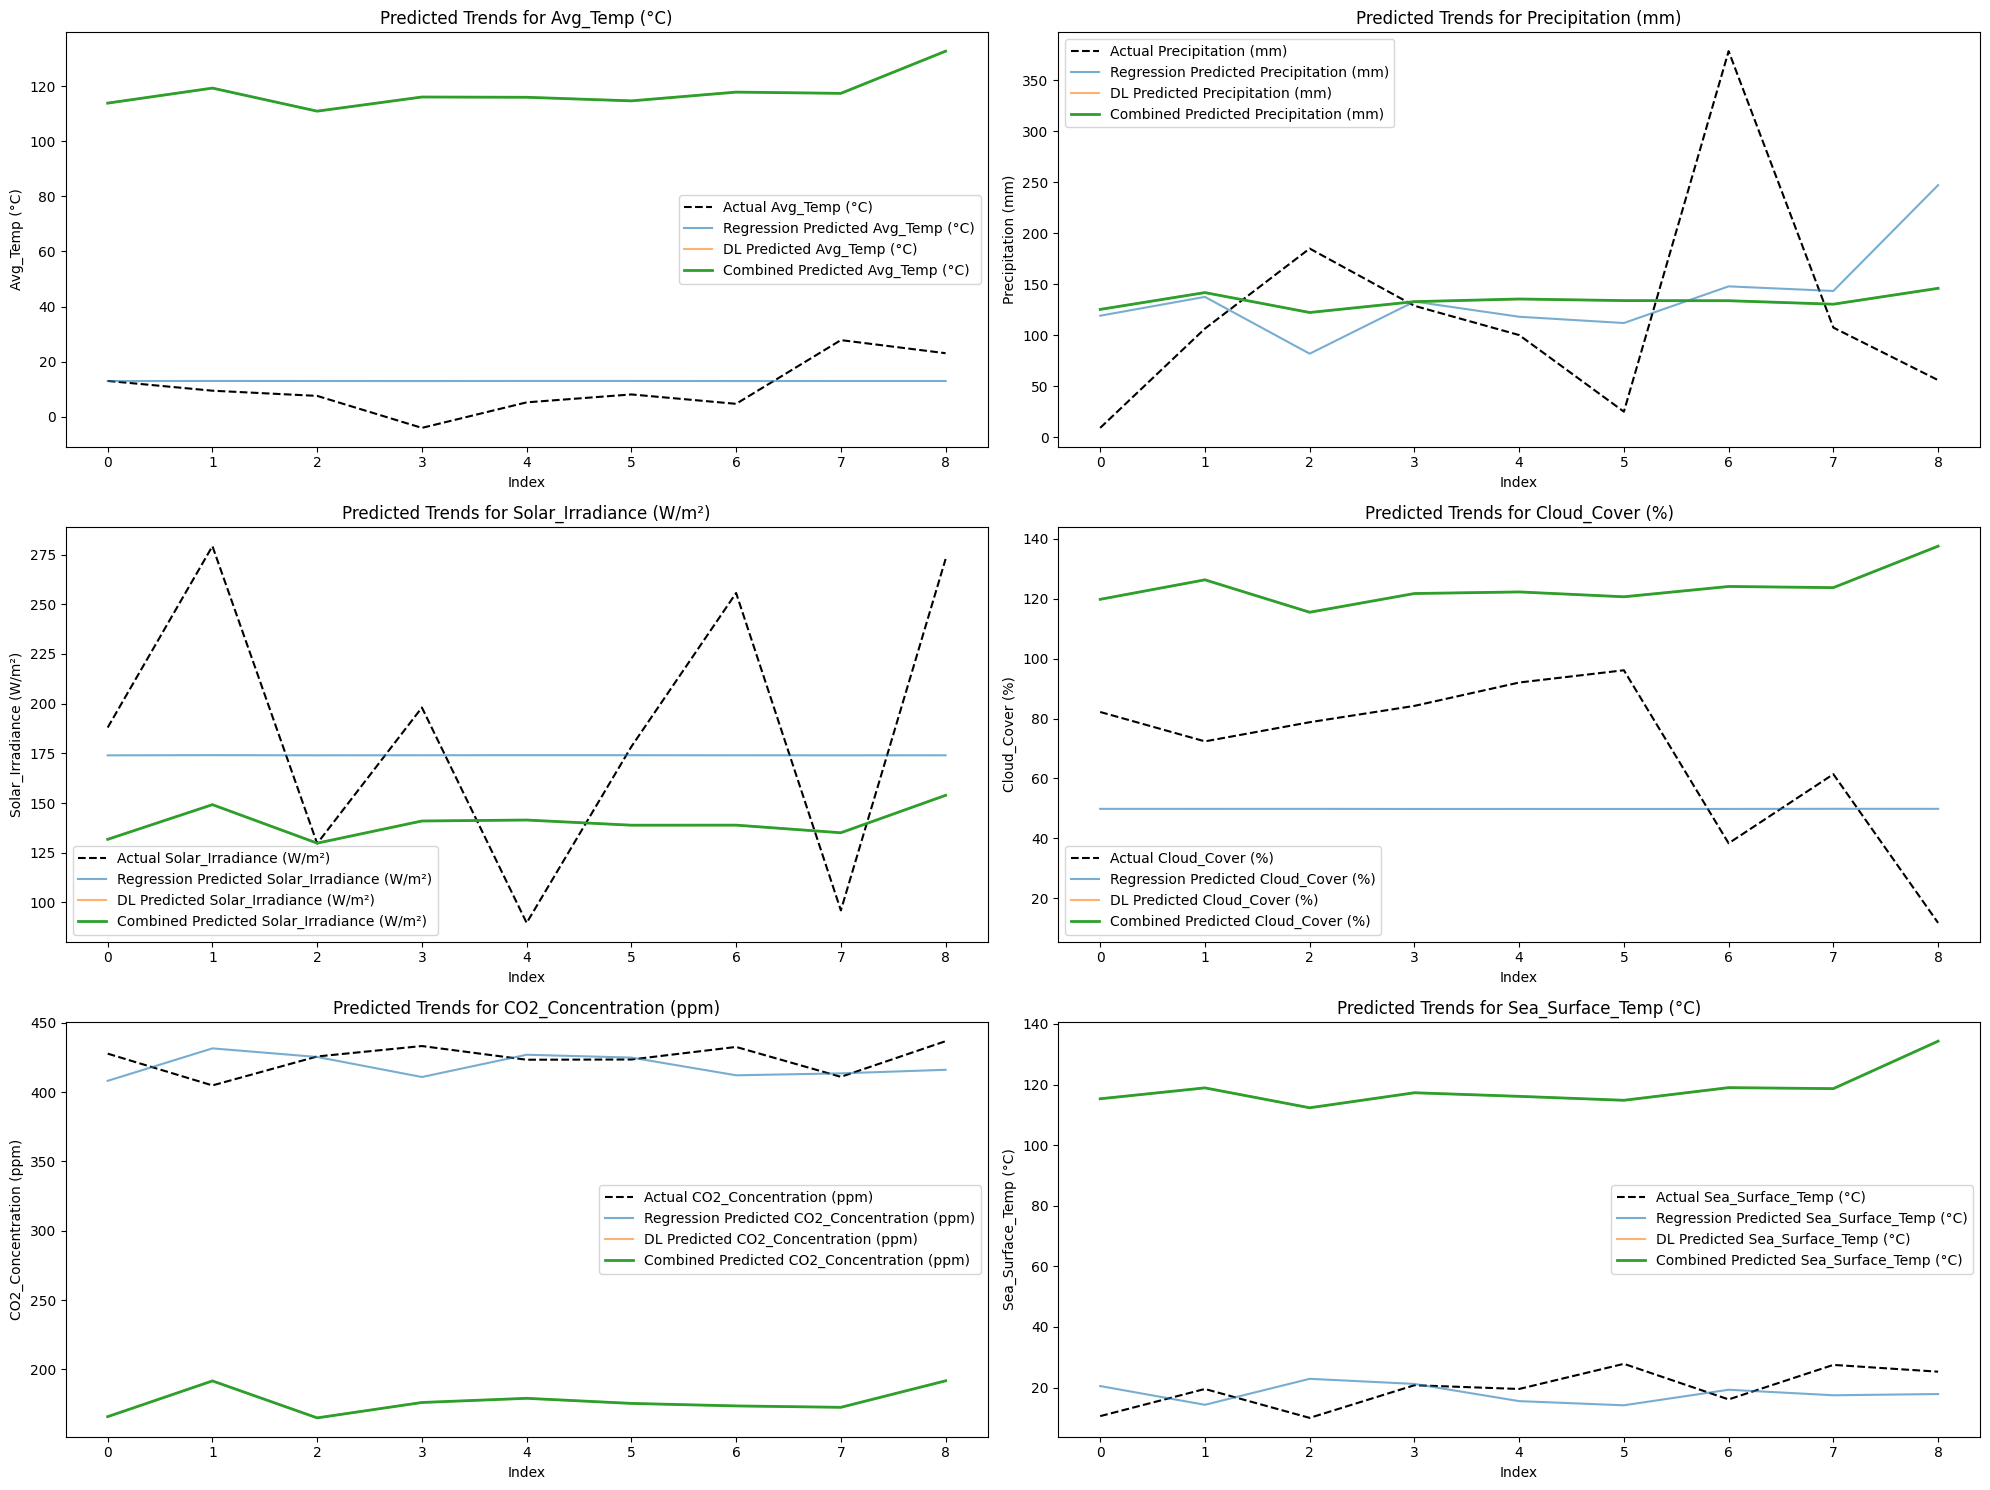

In [100]:
# Plotting line plots for trends from regression, deep learning, and combined models
plt.figure(figsize=(20, 15))
for i, target in enumerate(target_cols):
    plt.subplot(3, 2, i+1)
    
    # Plotting actual values 
    plt.plot(predictions_df.index, predictions_df[f'Actual_{target}'].values, label=f'Actual {target}', color='black', linestyle='dashed')
    
    # Plotting regression model predictions
    reg_predictions = best_models[target].predict(X_test)
    plt.plot(predictions_df.index, reg_predictions, label=f'Regression Predicted {target}', alpha=0.6)
    
    # Plotting deep learning model predictions
    plt.plot(predictions_df.index, dl_predictions[target], label=f'DL Predicted {target}', alpha=0.6)
    
    # Plotting combined model predictions
    plt.plot(predictions_df.index, final_predictions[target], label=f'Combined Predicted {target}', linewidth=2)
    
    plt.xlabel('Index')
    plt.ylabel(target)
    plt.title(f'Predicted Trends for {target}')
    plt.legend()

plt.tight_layout()
plt.show()


# Impact

*This AI-powered climate prediction and mitigation solution will: *

1.Enhance the ability of policymakers to anticipate and address climate-related challenges.

2.Enable organizations to implement data-driven climate action plans.

3.Contribute to global efforts in combating climate change and promoting sustainable development.

4.Foster collaboration across scientific, governmental, and industrial sectors to achieve a resilient and sustainable future.